In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Classifiers
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
# Data Import
ds=pd.read_csv('C:/Users/user/OneDrive/Desktop/Kaggle/Hepatitis/HepatitisCdata.csv')

In [3]:
ds

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [4]:
# First column is not needed
ds = ds.drop(ds.columns[0], axis=1)

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


In [6]:
ds.describe()

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


In [7]:
# Checking if there are any missing values
ds.isnull().values.any()

True

In [8]:
# Checking which rows have missing values
rows_with_nan = ds[ds.isnull().any(axis=1)]
print(rows_with_nan)

          Category  Age Sex   ALB    ALP    ALT    AST    BIL    CHE  CHOL  \
121  0=Blood Donor   43   m  48.6   45.0   10.5   40.5    5.3   7.09   NaN   
319  0=Blood Donor   32   f  47.4   52.5   19.1   17.1    4.6  10.19   NaN   
329  0=Blood Donor   33   f  42.4  137.2   14.2   13.1    3.4   8.23   NaN   
413  0=Blood Donor   46   f  42.9   55.1   15.2   29.8    3.6   8.37   NaN   
424  0=Blood Donor   48   f  45.6  107.2   24.4   39.0   13.8   9.77   NaN   
433  0=Blood Donor   48   f  46.8   93.3   10.0   23.2    4.3  12.41   NaN   
498  0=Blood Donor   57   f  48.4   94.4    2.5   39.6    2.3   8.84   NaN   
540    1=Hepatitis   38   m  45.0   56.3    NaN   33.1    7.0   9.58   6.0   
541    1=Hepatitis   19   m  41.0    NaN   87.0   67.0   12.0   7.55   3.9   
545    1=Hepatitis   29   m  49.0    NaN   53.0   39.0   15.0   8.79   3.6   
546    1=Hepatitis   30   m  45.0    NaN   66.0   45.0   14.0  12.16   6.1   
568     2=Fibrosis   49   m  39.0    NaN  118.0   62.0   10.0   

In [9]:
# Data division: categorical and numerical data
cat_features=['Category','Sex']
num_features=['Age','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL','CREA', 'GGT','PROT']

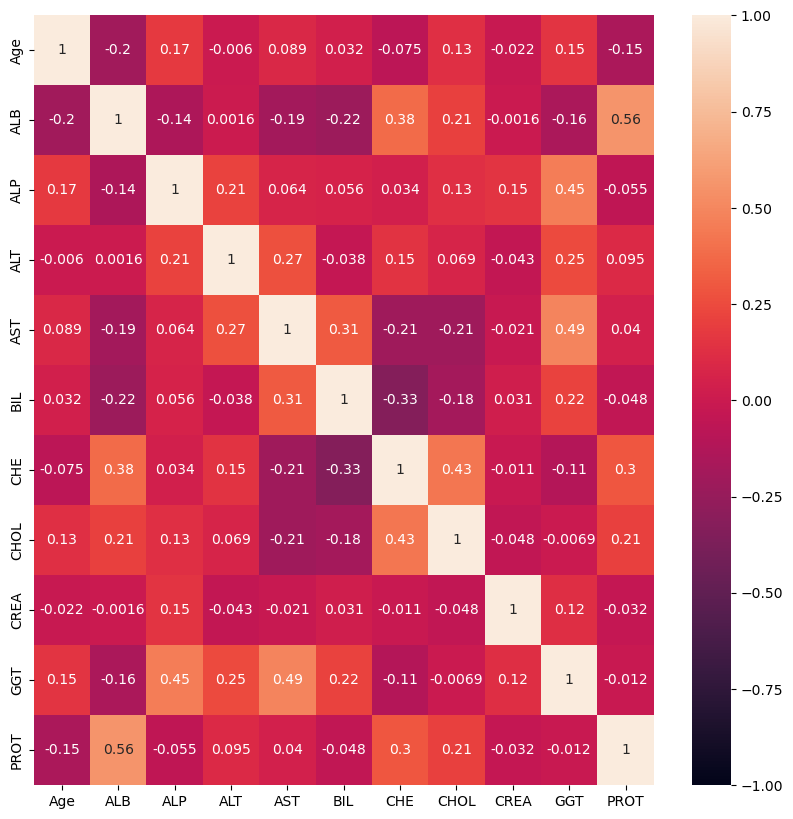

In [10]:
# Correlation matrix for numerical features
plt.figure(figsize=(10,10))
sns.heatmap(ds[num_features].corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [11]:
# Correlation between categorical features

def cramers_v(x, y):
    crosstab = pd.crosstab(x, y)
    chi2_result = stats.chi2_contingency(crosstab)
    chi2 = chi2_result[0]
    n = crosstab.sum().sum()
    phi2 = chi2 / n
    r, k = crosstab.shape
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

corr_matrix=[]

for col1 in cat_features:
  for col2 in cat_features:
    if col1 != col2:
      correlation = cramers_v(ds[col1], ds[col2])
      corr_matrix.append((col1,col2,correlation))
cm_ds=pd.DataFrame(corr_matrix)

cm_ds_sorted = cm_ds.sort_values(by=cm_ds.columns[-1])

cm_ds_sorted

,0,1,2
1,Sex,Category,0.07693
0,Category,Sex,0.07693


In [12]:
# Correlation between numerical and categorical data
corr_matrix = []

for col1 in num_features:
    for col2 in cat_features:
        if ds[col2].dtype == object:
            df=ds.fillna(ds.mean())
            encoder = LabelEncoder()
            encoded_col = encoder.fit_transform(df[col2])
            correlation = stats.pointbiserialr(df[col1], encoded_col)[0]
        else:
            correlation = stats.pointbiserialr(ds[col1], ds[col2])[0]
        corr_matrix.append((col1, col2, correlation))

cm_ds = pd.DataFrame(corr_matrix)
cm_ds_sorted = cm_ds.sort_values(by=cm_ds.columns[-1])
cm_ds_sorted

C:\Users\user\AppData\Local\Temp\ipykernel_13992\3018100506.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df=ds.fillna(ds.mean())


,0,1,2
12,CHE,Category,-0.329472
14,CHOL,Category,-0.300254
2,ALB,Category,-0.285467
15,CHOL,Sex,-0.029886
1,Age,Sex,-0.024544
5,ALP,Sex,-0.019547
20,PROT,Category,0.007160
4,ALP,Category,0.028488
21,PROT,Sex,0.051250
0,Age,Category,0.106341


<AxesSubplot:xlabel='Sex', ylabel='count'>

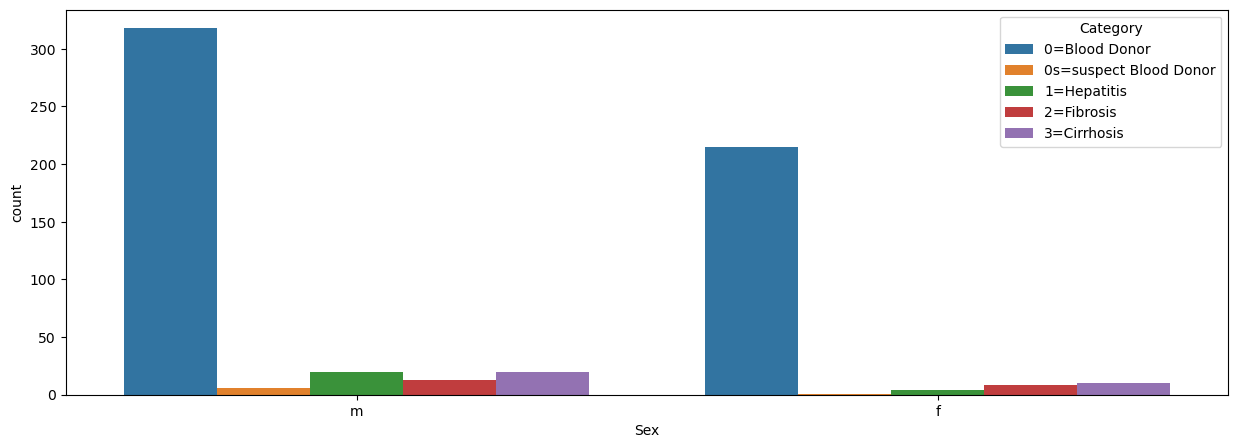

In [13]:
# Dataset visualisation: categorical features distribution
plt.figure(figsize=(15,5))
sns.countplot(x='Sex', hue='Category', data=ds)

C:\Users\user\AppData\Local\Temp\ipykernel_13992\710983863.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

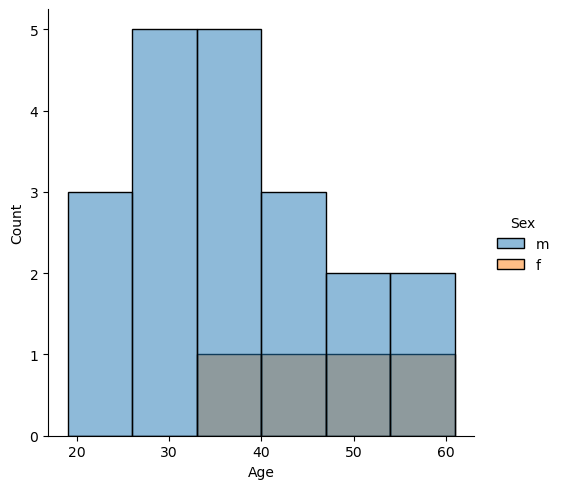

<Figure size 1500x500 with 0 Axes>

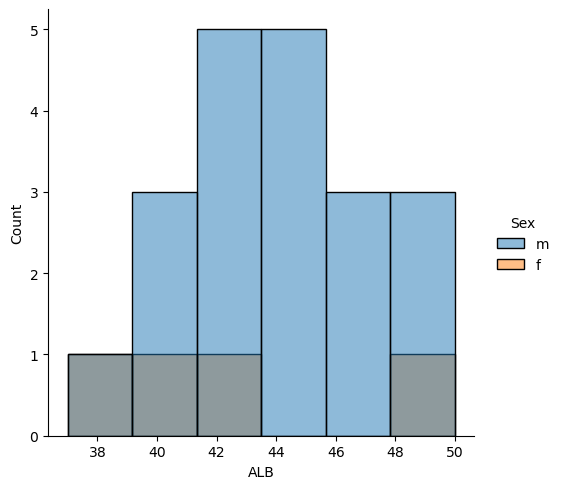

<Figure size 1500x500 with 0 Axes>

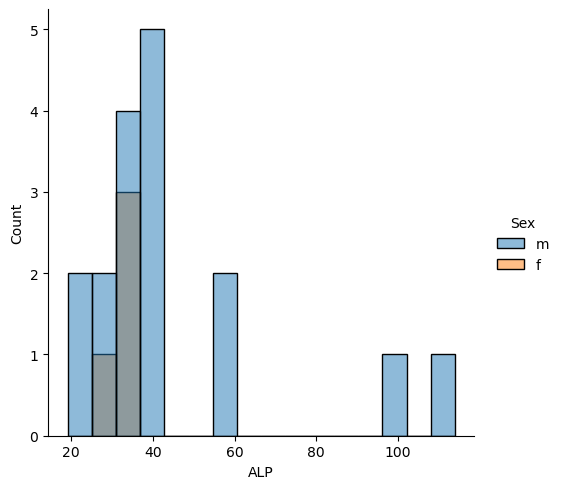

<Figure size 1500x500 with 0 Axes>

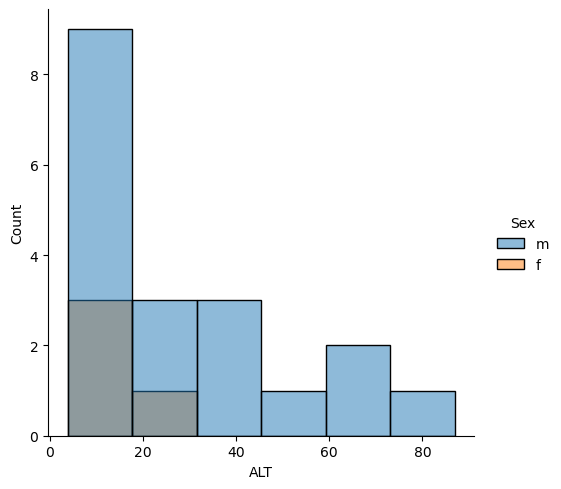

<Figure size 1500x500 with 0 Axes>

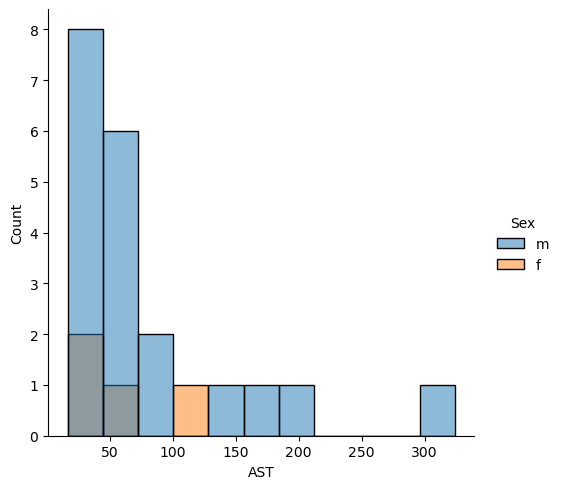

<Figure size 1500x500 with 0 Axes>

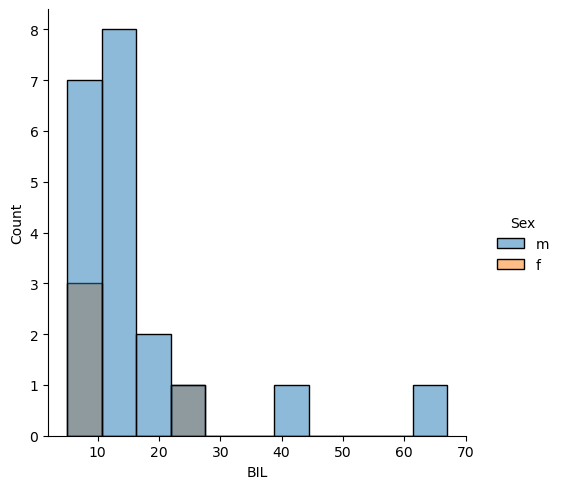

<Figure size 1500x500 with 0 Axes>

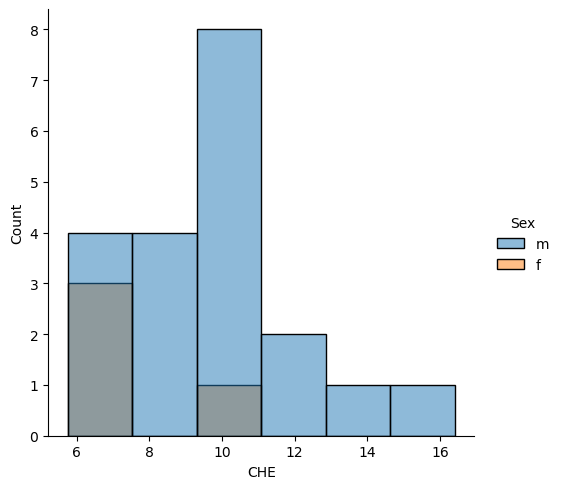

<Figure size 1500x500 with 0 Axes>

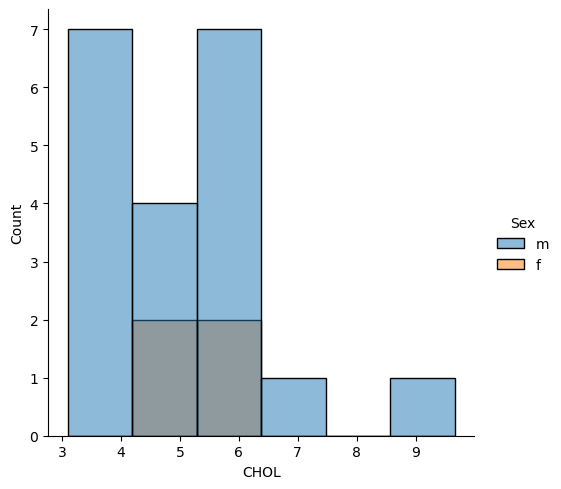

<Figure size 1500x500 with 0 Axes>

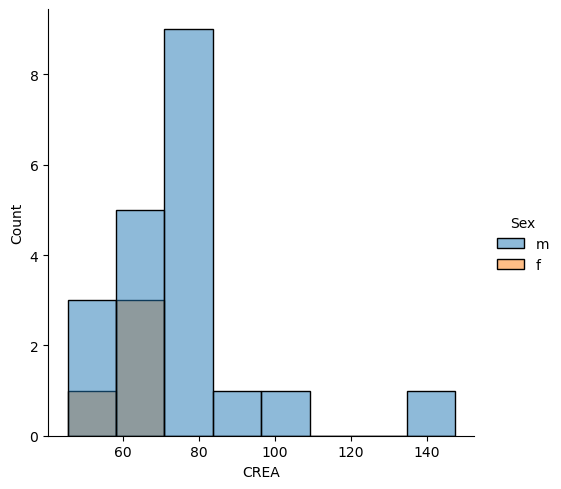

<Figure size 1500x500 with 0 Axes>

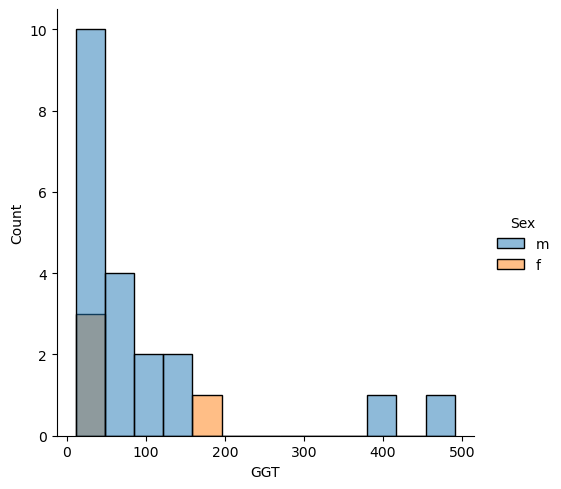

<Figure size 1500x500 with 0 Axes>

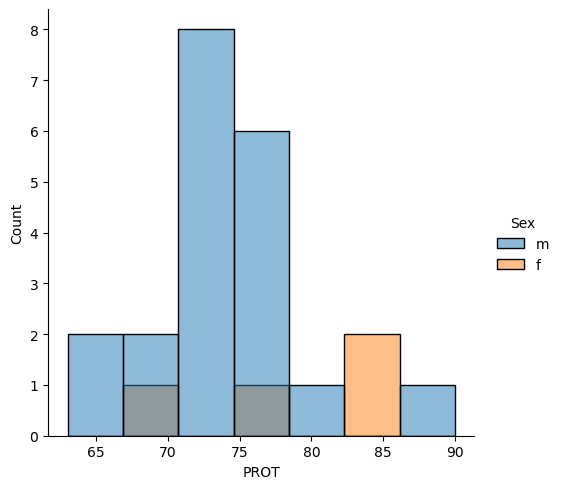

In [14]:
# Dataset visualisation: numerical features distribution of patients with hepatitis C
for feature in num_features:
  plt.figure(figsize=(15,5))
  sns.displot(x=feature, hue='Sex',data=ds[ds['Category'] == '1=Hepatitis'])

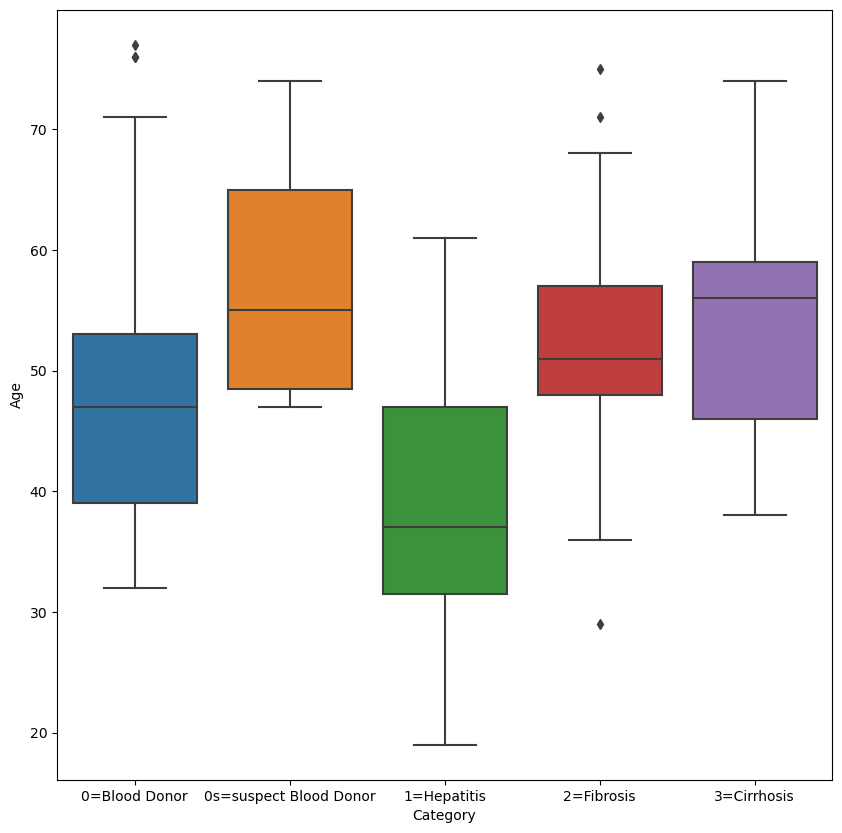

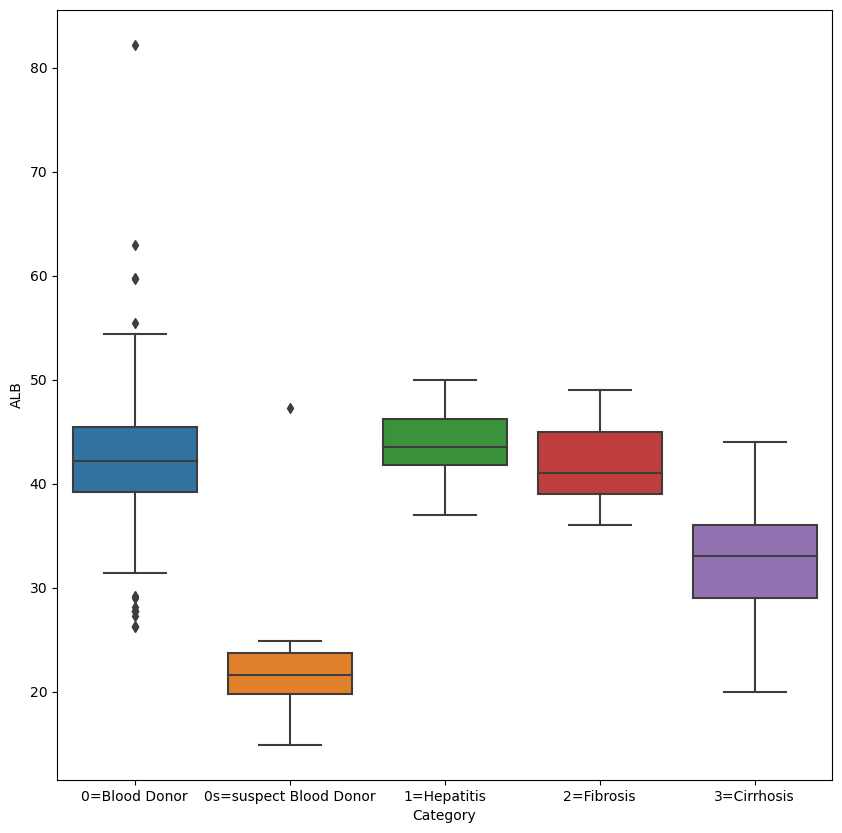

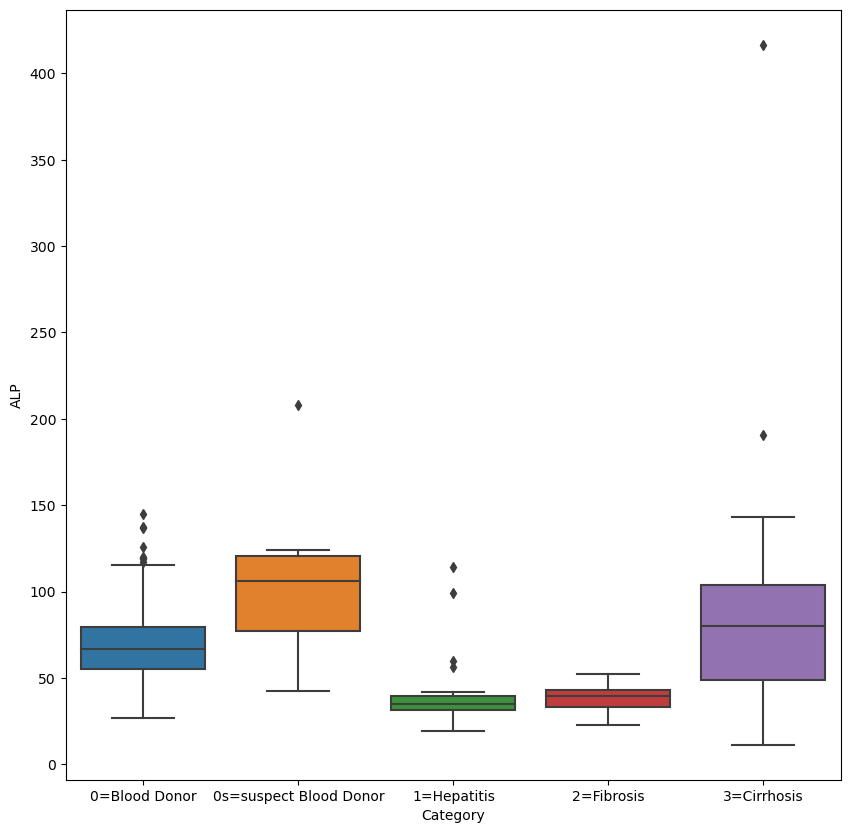

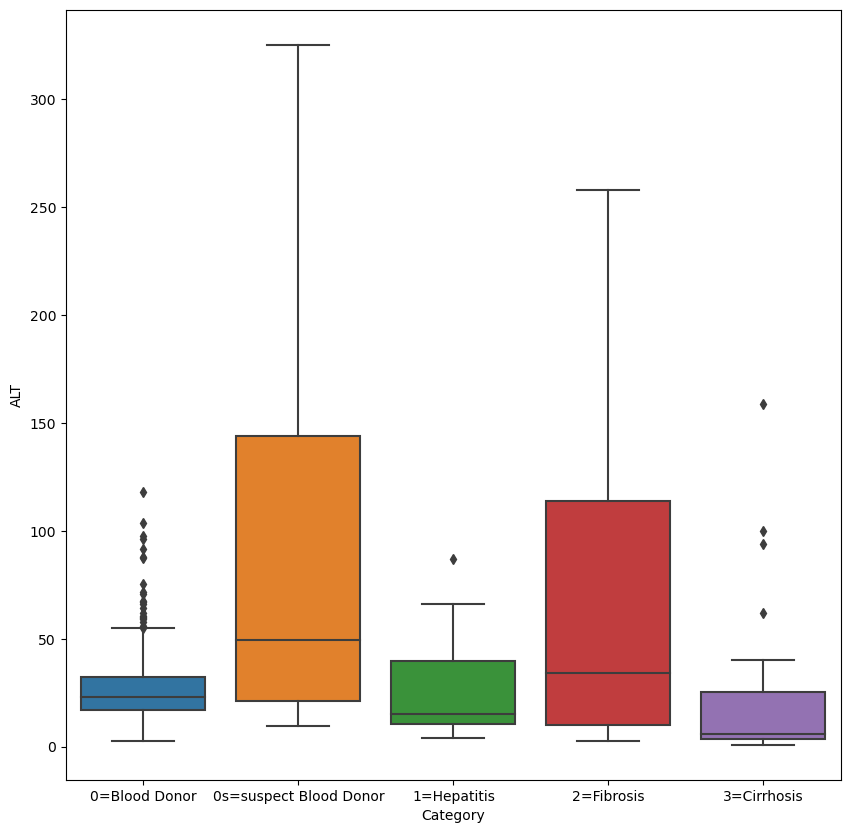

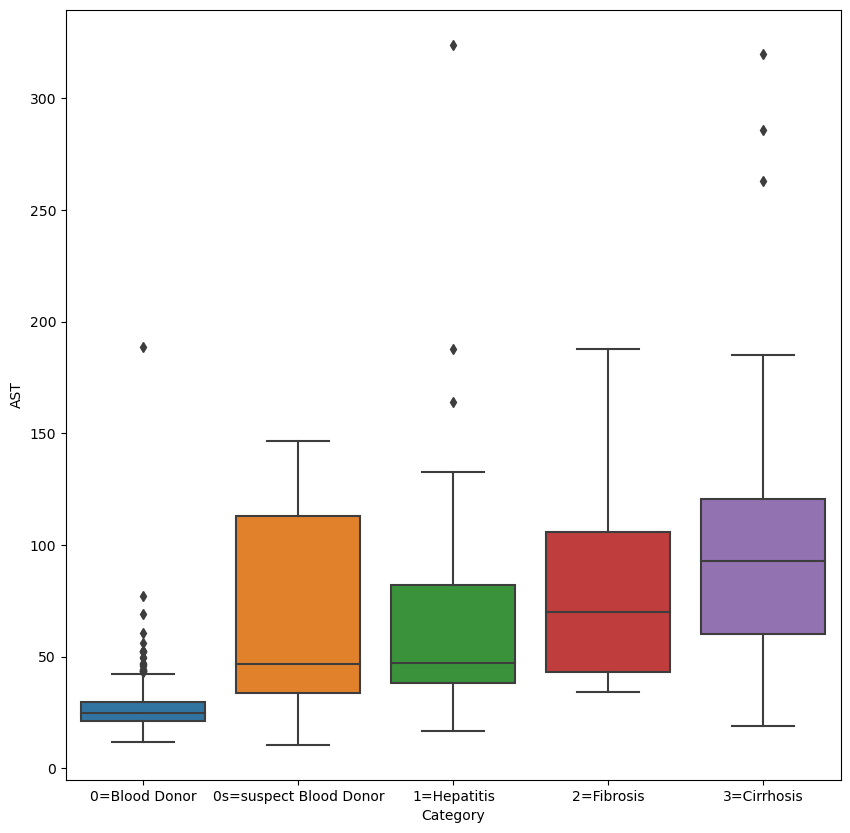

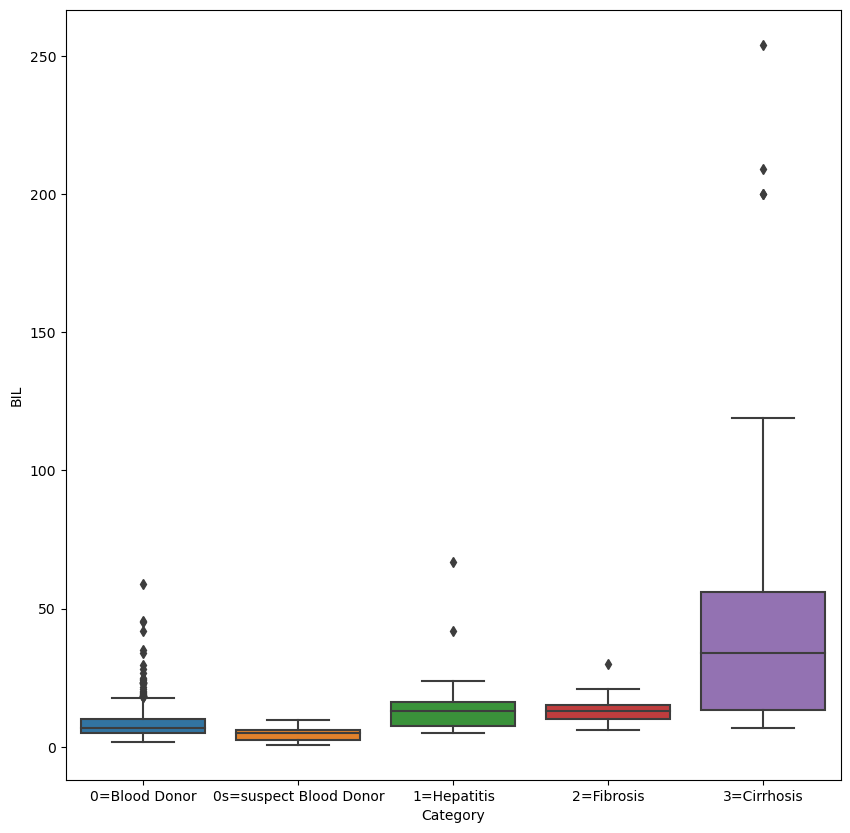

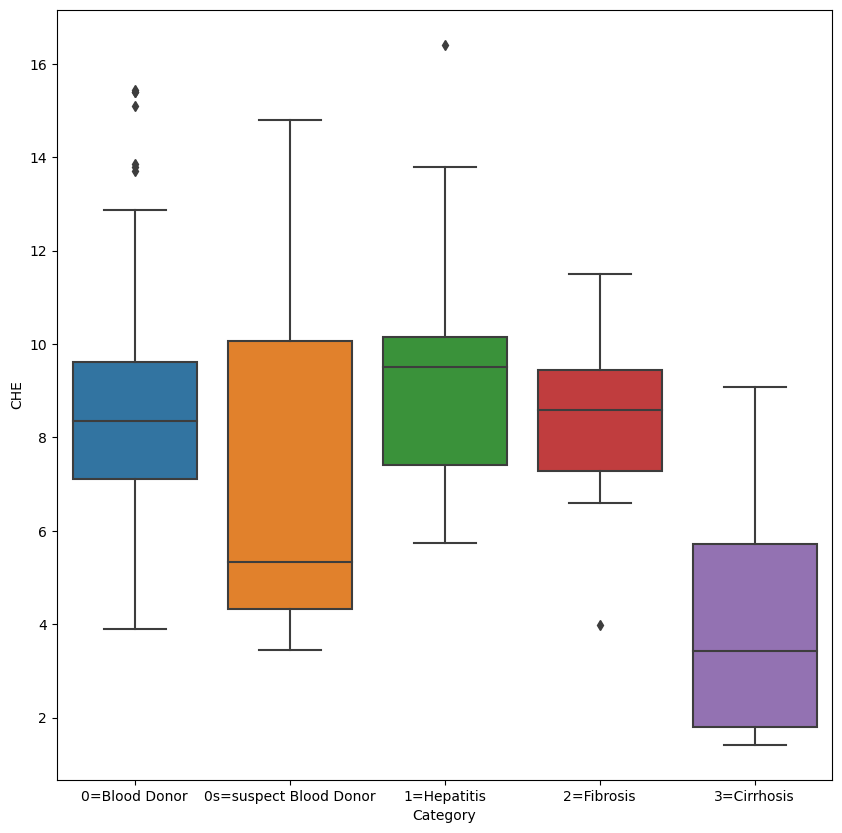

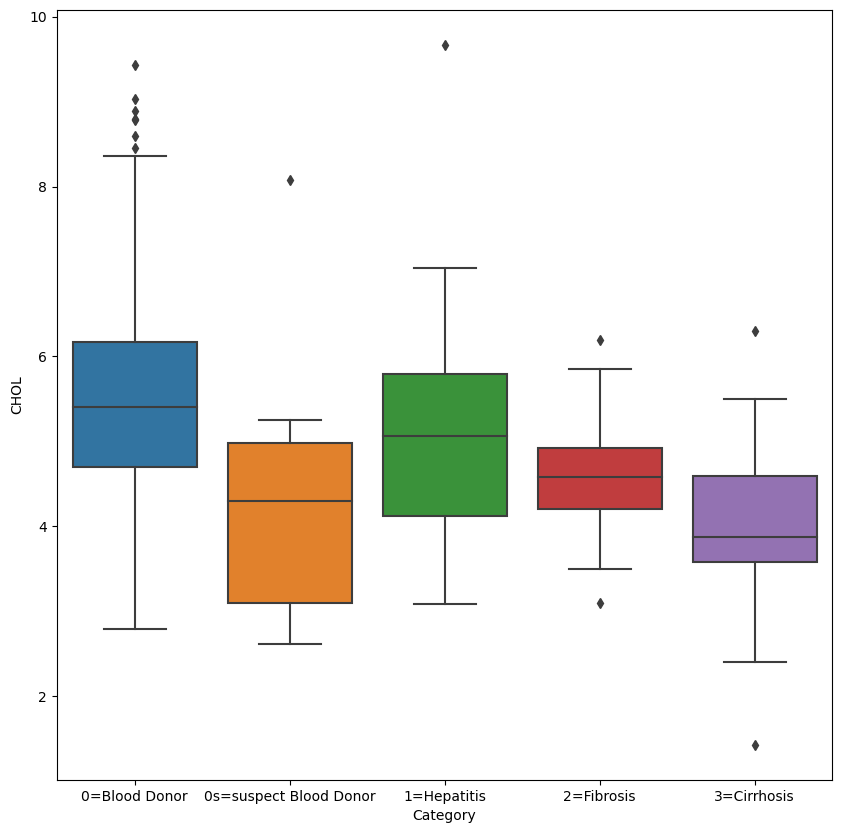

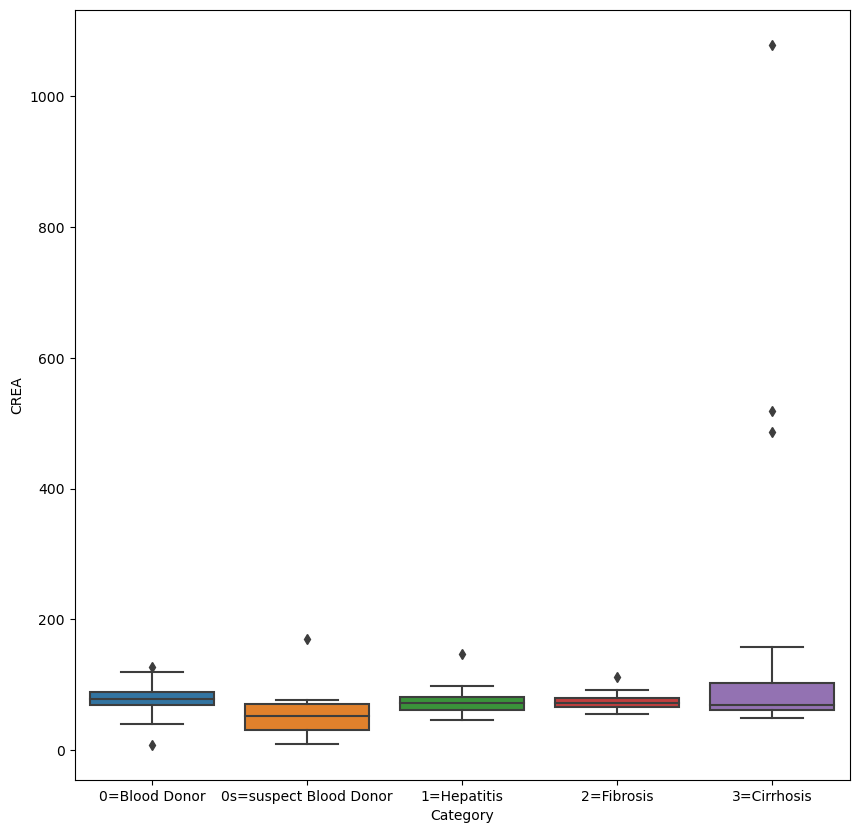

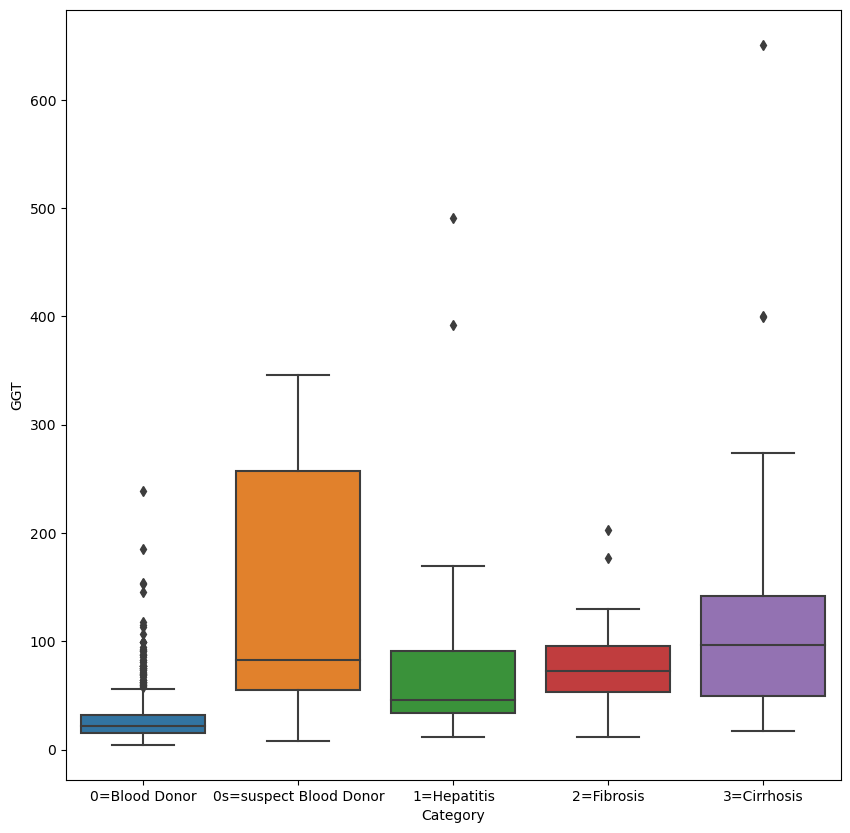

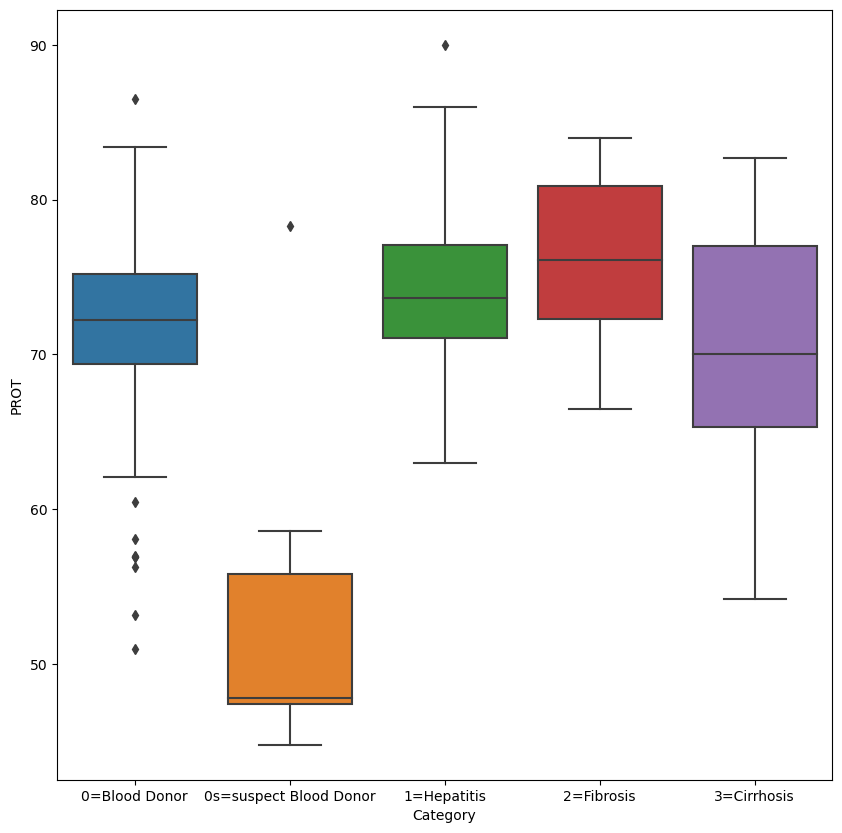

In [15]:
# Boxplots for numerical features
for feature in num_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(x='Category', y=feature, data=ds)

In [16]:
# Confusion matrix
def conf_matrix(y_checked, model_predictions):
    plt.figure()
    cm = confusion_matrix(y_checked, model_predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

In [17]:
# Model evaluation

models_data=[]

def model_evaluation(model, name, X_checked, y_checked):
    probabilities = model.predict_proba(X_checked)
    predict = model.predict(X_checked)
    accuracy = model.score(X_checked, y_checked)
    print('Confusion Matrix:')
    conf_matrix(y_checked, predict)
    print('Classification Report:\n', classification_report(y_checked, predict))
    f1 = f1_score(y_checked, predict, average='macro')
    roc_auc = roc_auc_score(y_checked, probabilities, multi_class='ovr')
    models_data.append((name, accuracy, roc_auc, f1))
    df = pd.DataFrame(models_data, columns=['Model', 'Accuracy', 'AUC-ROC', 'F1 Score'])
    return df

In [18]:
# Data preparation
X= ds.drop(['Category'], axis=1,).copy()
y=ds['Category'].copy()

label_encoder = LabelEncoder()
y_trans=label_encoder.fit_transform(y)

cat_features=['Sex']
num_features=['Age','ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL','CREA', 'GGT','PROT']

X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.20, random_state=42, stratify=y)

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures

# numerical features preparation
num_preparation = Pipeline(steps=[
    ('fill_missings', SimpleImputer(strategy='mean')),
    ('polynomial_features', PolynomialFeatures(degree=3)),
    ('scaler_1', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('scaler_2', StandardScaler())
])

# categorial features preparation
cat_preparation = Pipeline(steps=[
    ('encoder', OneHotEncoder(sparse=False ,handle_unknown='ignore'))
])

# transformer
data_preparation = ColumnTransformer(transformers=[
    ('numeric_preprocessing', num_preparation, num_features),
    ('categorical_preprocessing', cat_preparation, cat_features)
])

Fitting 6 folds for each of 2000 candidates, totalling 12000 fits
Parameters:  {'model__C': 1.7575106248547894, 'preprocessor__numeric_preprocessing__fill_missings__strategy': 'mean', 'preprocessor__numeric_preprocessing__pca__n_components': 0.95, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 2}
Confusion Matrix:


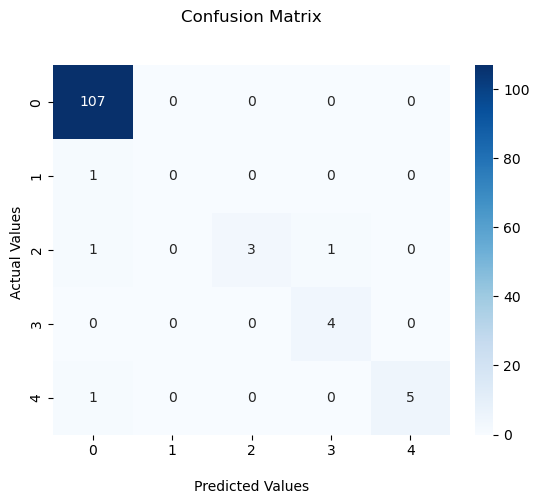

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       107
           1       0.00      0.00      0.00         1
           2       1.00      0.60      0.75         5
           3       0.80      1.00      0.89         4
           4       1.00      0.83      0.91         6

    accuracy                           0.97       123
   macro avg       0.75      0.69      0.71       123
weighted avg       0.96      0.97      0.96       123



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.96748,0.996389,0.706831


In [20]:
#Logistic Regression
model_pipeline_v1 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LogisticRegression(max_iter=2000))])

params = {
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'model__C': np.logspace(-4, 4, 50)
}

model_1 = GridSearchCV(model_pipeline_v1, params, cv=6, n_jobs=-1, verbose=10, scoring='f1_macro')
model_1.fit(X_train, y_train)
print('Parameters: ', model_1.best_params_)
model_1 = model_1.best_estimator_

model_evaluation(model_1,'LogisticRegression',X_test,y_test)

Fitting 6 folds for each of 240 candidates, totalling 1440 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.43601254 0.40342243 0.35908888 0.36197679 0.4278394  0.45476082
 0.41367757 0.40585448 0.42965572 0.43726041 0.44951667 0.4571741
 0.43571956 0.41767324 0.43478983 0.3677364  0.43571956 0.35061385
 0.32344746 0.36149088 0.42808233 0.39938354 0.35551706 0.39864346
 0.42807873 0.45476082 0.38086139 0.40633032 0.43450589 0.43726041
 0.44927749 0.4571741  0.44056369 0.42583019 0.43478983 0.37589334
 0.44056369 0.35061385 0.3367808  0.36149088 0.33063732 0.34771885
 0.364159   0.34787924 0.31440896 0.3533913  0.33391561 0.32740604
 0.28864689 0.31384285 0.33106953 0.33842083 0.28687991 0.34494965
 0.3000539  0.27294865 0.28687991 0.21643774 0.18562092 0.18582445
 0.33063732 0.34771885 0.36395003 0.34787924 0.31440896 0.3533913
 0.33391561 0.32740604 0.28864689 0.31384285 0.33106953 0.33842083
 0.28687991 0.35982947 0.30026568 0.27294865 0.28687991 

Parameters:  {'model__n_neighbors': 1, 'preprocessor__numeric_preprocessing__fill_missings__strategy': 'mean', 'preprocessor__numeric_preprocessing__pca__n_components': 0.95, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 4}
Confusion Matrix:


C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

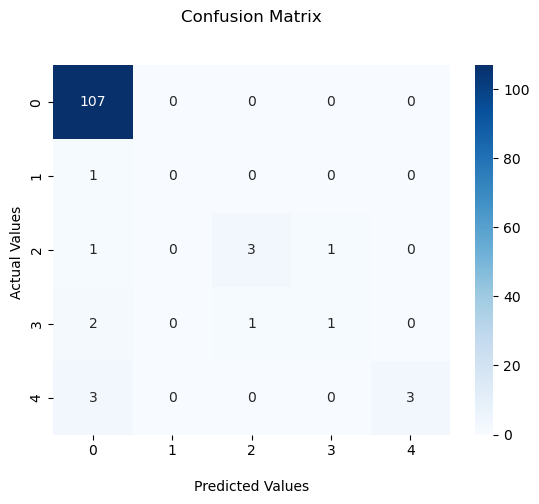

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       0.00      0.00      0.00         1
           2       0.75      0.60      0.67         5
           3       0.50      0.25      0.33         4
           4       1.00      0.50      0.67         6

    accuracy                           0.93       123
   macro avg       0.64      0.47      0.53       123
weighted avg       0.91      0.93      0.91       123



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.967480,0.996389,0.706831
1,KNeighbors,0.926829,0.689562,0.526998


In [21]:
# K Neighbors Classifier

model_pipeline_v2 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', KNeighborsClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__n_neighbors': [1,5,10,50,100,500]
}

model_2 = GridSearchCV(model_pipeline_v2, params, cv=6, n_jobs=-1, verbose=10, scoring='f1_macro')
model_2.fit(X_train, y_train)
print('Parameters: ', model_2.best_params_)
model_2 = model_2.best_estimator_

model_evaluation(model_2,'KNeighbors',X_test,y_test)

Fitting 6 folds for each of 3200 candidates, totalling 19200 fits
Parameters:  {'model__max_depth': 5, 'model__min_samples_leaf': 2, 'model__min_samples_split': 7, 'preprocessor__numeric_preprocessing__fill_missings__strategy': 'median', 'preprocessor__numeric_preprocessing__pca__n_components': 0.85, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 1}
Confusion Matrix:


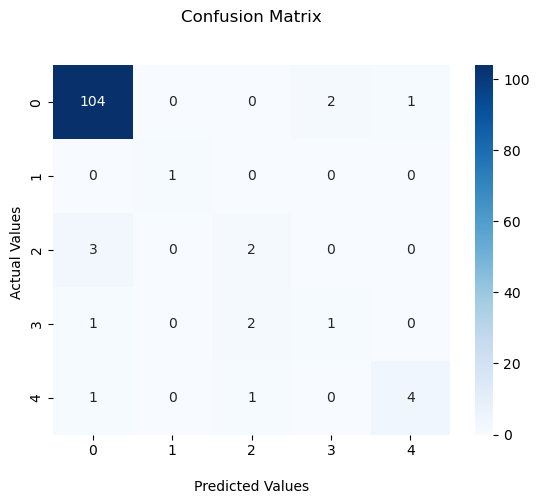

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       107
           1       1.00      1.00      1.00         1
           2       0.40      0.40      0.40         5
           3       0.33      0.25      0.29         4
           4       0.80      0.67      0.73         6

    accuracy                           0.91       123
   macro avg       0.70      0.66      0.68       123
weighted avg       0.90      0.91      0.91       123



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.967480,0.996389,0.706831
1,KNeighbors,0.926829,0.689562,0.526998
2,DecisionTree,0.910569,0.831287,0.675190


In [22]:
# DecisionTree

model_pipeline_v3 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', DecisionTreeClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__max_depth': [1,2,3,5,7],
    'model__min_samples_split': [2,5,7,10],
    'model__min_samples_leaf': [2,5,7,10]
}

model_3 = GridSearchCV(model_pipeline_v3, params, cv=6, n_jobs=-1, verbose=10, scoring='f1_macro')
model_3.fit(X_train, y_train)
print('Parameters: ', model_3.best_params_)
model_3 = model_3.best_estimator_

model_evaluation(model_3,'DecisionTree',X_test,y_test)

Fitting 6 folds for each of 1080 candidates, totalling 6480 fits
Parameters:  {'model__C': 10, 'model__gamma': 0.1, 'model__kernel': 'linear', 'preprocessor__numeric_preprocessing__fill_missings__strategy': 'mean', 'preprocessor__numeric_preprocessing__pca__n_components': 0.85, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 3}
Confusion Matrix:


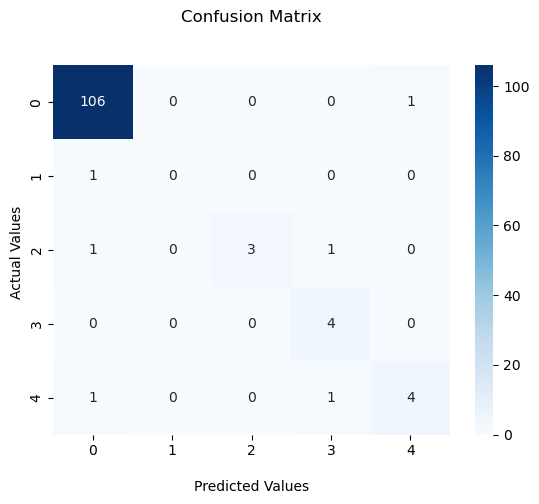

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.00      0.00      0.00         1
           2       1.00      0.60      0.75         5
           3       0.67      1.00      0.80         4
           4       0.80      0.67      0.73         6

    accuracy                           0.95       123
   macro avg       0.69      0.65      0.65       123
weighted avg       0.95      0.95      0.95       123



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.967480,0.996389,0.706831
1,KNeighbors,0.926829,0.689562,0.526998
2,DecisionTree,0.910569,0.831287,0.675190
3,SVC,0.951220,0.928261,0.651751


In [23]:
# SVC

model_pipeline_v4 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', SVC(probability=True))])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__kernel': ['linear', 'rbf', 'poly'],
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.1, 0.01, 0.001]
}

model_4 = GridSearchCV(model_pipeline_v4, params, cv=6, n_jobs=-1, verbose=10, scoring='f1_macro')
model_4.fit(X_train, y_train)
print('Parameters: ', model_4.best_params_)
model_4 = model_4.best_estimator_

model_evaluation(model_4,'SVC',X_test,y_test)

Fitting 6 folds for each of 1440 candidates, totalling 8640 fits
Parameters:  {'model__max_depth': 10, 'model__n_estimators': 5, 'preprocessor__numeric_preprocessing__fill_missings__strategy': 'median', 'preprocessor__numeric_preprocessing__pca__n_components': 0.85, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 1}
Confusion Matrix:


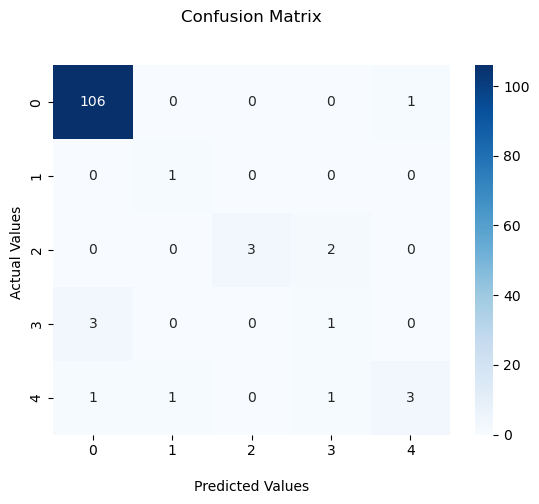

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.50      1.00      0.67         1
           2       1.00      0.60      0.75         5
           3       0.25      0.25      0.25         4
           4       0.75      0.50      0.60         6

    accuracy                           0.93       123
   macro avg       0.69      0.67      0.65       123
weighted avg       0.93      0.93      0.92       123



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.967480,0.996389,0.706831
1,KNeighbors,0.926829,0.689562,0.526998
2,DecisionTree,0.910569,0.831287,0.675190
3,SVC,0.951220,0.928261,0.651751
4,RandomForest,0.926829,0.960487,0.648725


In [24]:
# Random Forest
model_pipeline_v5 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model',  RandomForestClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__n_estimators': [1,5,10,50,100,500],
    'model__max_depth': [1,2,3,5,7,10]
}

model_5 = GridSearchCV(model_pipeline_v5, params, cv=6, n_jobs=-1, verbose=10, scoring='f1_macro')
model_5.fit(X_train, y_train)
print('Parameters: ', model_5.best_params_)
model_5 = model_5.best_estimator_

model_evaluation(model_5,'RandomForest',X_test,y_test)

Fitting 6 folds for each of 2160 candidates, totalling 12960 fits
Parameters:  {'model__learning_rate': 0.1, 'model__max_depth': 2, 'model__n_estimators': 500, 'preprocessor__numeric_preprocessing__fill_missings__strategy': 'mean', 'preprocessor__numeric_preprocessing__pca__n_components': 0.95, 'preprocessor__numeric_preprocessing__polynomial_features__degree': 1}
Confusion Matrix:


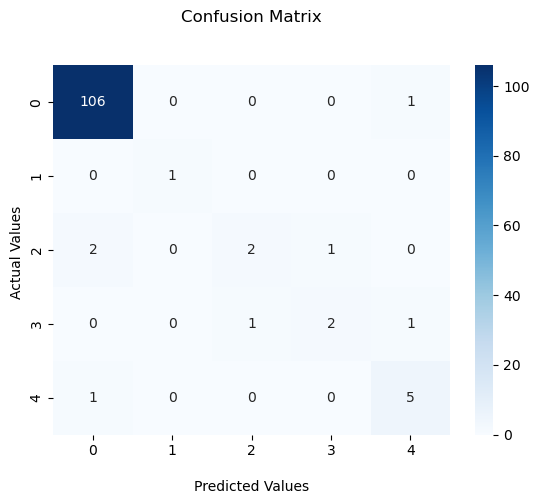

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       1.00      1.00      1.00         1
           2       0.67      0.40      0.50         5
           3       0.67      0.50      0.57         4
           4       0.71      0.83      0.77         6

    accuracy                           0.94       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.94      0.94      0.94       123



,Model,Accuracy,AUC-ROC,F1 Score
0,LogisticRegression,0.967480,0.996389,0.706831
1,KNeighbors,0.926829,0.689562,0.526998
2,DecisionTree,0.910569,0.831287,0.675190
3,SVC,0.951220,0.928261,0.651751
4,RandomForest,0.926829,0.960487,0.648725
5,LGBM,0.943089,0.983796,0.764428


In [25]:
#LGBM
model_pipeline_v7 = Pipeline(steps=[('preprocessor', data_preparation),
                                    ('model', LGBMClassifier())])

params = {
    'preprocessor__numeric_preprocessing__pca__n_components': [0.85, 0.90, 0.95, 0.99, 0.99999],
    'preprocessor__numeric_preprocessing__fill_missings__strategy': ['mean', 'median'],
    'preprocessor__numeric_preprocessing__polynomial_features__degree': [1, 2, 3, 4],
    'model__learning_rate': [0.1, 0.01, 0.001],
    'model__max_depth': [1,2,3,5,7,10],
    'model__n_estimators': [100, 500, 1000]
}

model_7 = GridSearchCV(model_pipeline_v7, params, cv=6, n_jobs=-1, verbose=10, scoring='f1_macro')
model_7.fit(X_train, y_train)
print('Parameters: ', model_7.best_params_)
model_7 = model_7.best_estimator_

model_evaluation(model_7,'LGBM',X_test,y_test)

Epoch 1/200
13/13 [==============================] - 1s 19ms/step - loss: 1.2143 - accuracy: 0.7506 - val_loss: 0.9306 - val_accuracy: 0.8687
Epoch 2/200
13/13 [==============================] - 0s 5ms/step - loss: 0.7760 - accuracy: 0.8651 - val_loss: 0.7749 - val_accuracy: 0.8687
Epoch 3/200
13/13 [==============================] - 0s 5ms/step - loss: 0.5552 - accuracy: 0.8677 - val_loss: 0.5533 - val_accuracy: 0.8687
Epoch 4/200
13/13 [==============================] - 0s 5ms/step - loss: 0.3792 - accuracy: 0.8957 - val_loss: 0.4109 - val_accuracy: 0.8990
Epoch 5/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2864 - accuracy: 0.9211 - val_loss: 0.3588 - val_accuracy: 0.8990
Epoch 6/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2346 - accuracy: 0.9186 - val_loss: 0.3176 - val_accuracy: 0.8990
Epoch 7/200
13/13 [==============================] - 0s 5ms/step - loss: 0.2114 - accuracy: 0.9288 - val_loss: 0.2714 - val_accuracy: 0.8990
Epoch 8/200


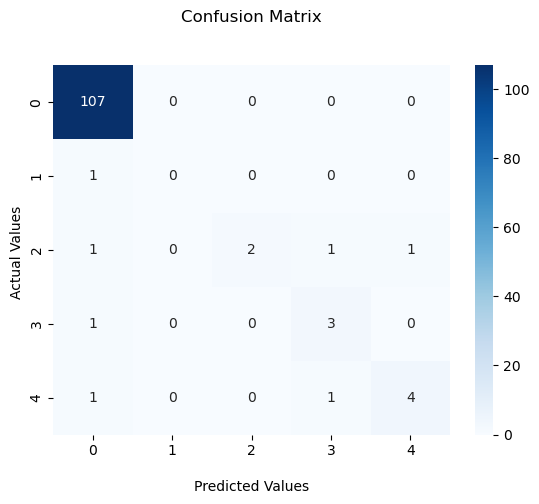

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       107
           1       0.00      0.00      0.00         1
           2       1.00      0.40      0.57         5
           3       0.60      0.75      0.67         4
           4       0.80      0.67      0.73         6

    accuracy                           0.94       123
   macro avg       0.67      0.56      0.59       123
weighted avg       0.94      0.94      0.93       123

AUC-ROC: 0.7541312935430582


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
# Neural Network

# Data preparation

X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.20, random_state=42, stratify=y_trans)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42, stratify=y_train)

X_train_trans = data_preparation.fit_transform(X_train)
X_test_trans = data_preparation.transform(X_test)
X_val_trans = data_preparation.transform(X_val)

from keras.utils import to_categorical

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
y_val_one_hot = to_categorical(y_val)


# Model

model_8 = tf.keras.Sequential()
model_8.add(Dense(200, activation='relu', input_dim=X_train_trans.shape[1]))
model_8.add(Dropout(0.2))
model_8.add(Dense(100, activation='relu'))
model_8.add(Dropout(0.2))
model_8.add(Dense(5, activation='softmax'))

model_8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

es = EarlyStopping(patience=5, monitor='val_loss', restore_best_weights=True)
model_8.fit(X_train_trans, y_train_one_hot, epochs=200, batch_size=32, callbacks=[es], validation_data=(X_val_trans, y_val_one_hot))

# Evaluation

predictions = model_8.predict(X_test_trans)
predictions_one_hot = to_categorical(np.argmax(predictions, axis=1))

print("Confusion Matrix:")
conf_matrix(y_test, np.argmax(predictions, axis=1))

cr = classification_report(y_test, np.argmax(predictions, axis=1))
print("Classification Report:")
print(cr)

auc_roc = roc_auc_score(y_test_one_hot, predictions_one_hot)

print("AUC-ROC:", auc_roc)

